1. Q: Load the NHANES dataset and use the view and slicing techniques to look at the dataset. How many column vectors do you see? How many rows are in the dataset? How many numerical column vectors do you see?

In [ ]:
# Load libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set presets.
pd.set_option('display.max_rows', None)

# Read from CSV.
NHANES = pd.read_csv('NHANES.csv')

# Check shape.
n_rows, n_cols = NHANES.shape
n_numeric = NHANES.select_dtypes(include = 'number').shape[1]
print('rows: ', n_rows)
print('columns: ', n_cols)
print('numeric columns: ', n_numeric)

rows:  10000
columns:  75
numeric columns:  45


1. A: There are 10000 rows (observations) and 75 column vectors (variables). There are 45 numerical column vectors.

2. Q: For each potential predictive column vector find the: (a) minimum value, (b) maximum value, (c) median value, (d) mean value, (e) standard deviation (f) number of unique values. Why is this difficult given the data in its current state? Which column vectors do not work for (a)-(e)? What is wrong with them? Use numpy to fix these issues as demonstrated in CH03_sup JNB.

In [70]:
# Compute min, max, median, mean, standard deviation, and # of unique values.
rows = []
for col in NHANES.columns:
    s = NHANES[col]
    if pd.api.types.is_numeric_dtype(s):
        x = np.asarray(s, dtype = float)
        rows.append({
            'column': col,
            'min': np.min(x),
            'max': np.max(x),
            'median': np.median(x),
            'mean': np.mean(x),
            'std': np.std(x, ddof = 1),
            'n_unique': s.nunique(dropna = True)
        })
    else:
        # For categorical/text columns, (a)-(e) are NOT defined.
        rows.append({
            'column': col,
            'min': np.nan,
            'max': np.nan,
            'median': np.nan,
            'mean': np.nan,
            'std': np.nan,
            'n_unique': s.nunique(dropna = True)
        })
summary_bad = pd.DataFrame(rows).set_index('column')
summary_bad

,min,max,median,mean,std,n_unique
column,,,,,,
SurveyYr,NaN,NaN,NaN,NaN,NaN,2
ID,51624.0,71915.0,62159.5,61944.6438,5871.167160,6779
Gender,NaN,NaN,NaN,NaN,NaN,2
Age,0.0,80.0,36.0,36.7421,22.397566,81
AgeDecade,NaN,NaN,NaN,NaN,NaN,8
AgeMonths,NaN,NaN,NaN,NaN,NaN,910
Race1,NaN,NaN,NaN,NaN,NaN,5
Race3,NaN,NaN,NaN,NaN,NaN,6
Education,NaN,NaN,NaN,NaN,NaN,5


2. A (part 1): The summary in (a)–(f) is difficult in the NHANES dataset because many predictors are not stored as purely numeric vectors in their current state. Several columns are categorical (string/object) variables such as sex, race, education level, and yes/no survey responses, and numeric summaries like the mean, median, and standard deviation are not defined for these raw text categories. In addition, many columns contain missing values (`NaN`), which must be handled explicitly or filtered out to avoid invalid computations. The columns which do not work for parts (a)–(e) are the non-numeric (object/category) predictors. Nothing is “wrong” with these columns conceptually; they represent categorical survey responses rather than continuous measurements, but they cannot be summarized with arithmetic statistics until they are encoded into numeric form. As shown in the CH03_sup notebook, one way to “fix” this is to convert these columns to categorical variables and then use their category codes (`.cat.codes`), replacing the missing-code value `-1` with `np.nan`. After that, numpy can compute statistics safely by ignoring missing values (e.g., using `np.nanmean`, `np.nanmedian`, or filtering with `x[~np.isnan(x)]`). For categorical variables, a more interpretable summary is to report level frequencies using `value_counts()` alongside the number of unique levels. Let us first fix the numeric columns resulting in NaN summaries by avoiding NaN values when calculating the statistics.

In [71]:
# Fix numeric summaries by ignoring NaN values.
# Compute min, max, median, mean, standard deviation, and # of unique values.
rows = []
for col in NHANES.columns:
    s = NHANES[col]
    if pd.api.types.is_numeric_dtype(s):
        x = np.asarray(s, dtype = float)
        rows.append({
            'column': col,
            'min': np.nanmin(x),
            'max': np.nanmax(x),
            'median': np.nanmedian(x),
            'mean': np.nanmean(x),
            'std': np.nanstd(x, ddof = 1),
            'n_unique': s.nunique(dropna = True)
        })
    else:
        # For categorical/text columns, (a)-(e) are NOT defined.
        rows.append({
            'column': col,
            'min': np.nan,
            'max': np.nan,
            'median': np.nan,
            'mean': np.nan,
            'std': np.nan,
            'n_unique': s.nunique(dropna = True)
        })

summary_fixed = pd.DataFrame(rows).set_index('column')
summary_fixed

,min,max,median,mean,std,n_unique
column,,,,,,
SurveyYr,NaN,NaN,NaN,NaN,NaN,2
ID,51624.00,71915.000,62159.500,61944.643800,5871.167160,6779
Gender,NaN,NaN,NaN,NaN,NaN,2
Age,0.00,80.000,36.000,36.742100,22.397566,81
AgeDecade,NaN,NaN,NaN,NaN,NaN,8
AgeMonths,0.00,959.000,418.000,420.123942,259.043091,910
Race1,NaN,NaN,NaN,NaN,NaN,5
Race3,NaN,NaN,NaN,NaN,NaN,6
Education,NaN,NaN,NaN,NaN,NaN,5


2. A (part 2): The numeric columns are now repaired by ignoring missing values when computing summary statistics, which is why the ``np.nan*`` functions produce valid results even when a column contains ``NaN`` entries. However, many NHANES predictors are still categorical (stored as strings/objects), so parts (a)–(e) remain undefined for them. For these variables, the most informative summary is the frequency of each category (including missing values), i.e., how many observations fall into each level. We therefore next summarize the categorical predictors using counts via ``value_counts()``.

In [72]:
# Count category frequencies for non-numeric columns.
non_numeric_cols = NHANES.select_dtypes(exclude = 'number').columns
for col in non_numeric_cols:
    display(
        NHANES[col]
        .value_counts(dropna = False)
        .to_frame(name = 'count')
    )

,count
SurveyYr,
2009_10,5000
2011_12,5000


,count
Gender,
female,5020
male,4980


,count
AgeDecade,
40-49,1398
0-9,1391
10-19,1374
20-29,1356
30-39,1338
50-59,1304
60-69,919
70+,587
NaN,333


,count
Race1,
White,6372
Black,1197
Mexican,1015
Other,806
Hispanic,610


,count
Race3,
NaN,5000
White,3135
Black,589
Mexican,480
Hispanic,350
Asian,288
Other,158


,count
Education,
NaN,2779
SomeCollege,2267
CollegeGrad,2098
HighSchool,1517
9_11thGrade,888
8thGrade,451


,count
MaritalStatus,
Married,3945
NaN,2769
NeverMarried,1380
Divorced,707
LivePartner,560
Widowed,456
Separated,183


,count
HHIncome,
more 99999,2220
75000-99999,1084
25000-34999,958
35000-44999,863
NaN,811
45000-54999,784
55000-64999,621
20000-24999,617
10000-14999,543


,count
HomeOwn,
Own,6425
Rent,3287
Other,225
NaN,63


,count
Work,
Working,4613
NotWorking,2847
NaN,2229
Looking,311


,count
BMICatUnder20yrs,
NaN,8726
b_NormWeight,805
d_Obese,221
c_OverWeight,193
a_UnderWeight,55


,count
BMI_WHO,
18.5_to_24.9,2911
30.0_plus,2751
25.0_to_29.9,2664
12.0_18.5,1277
NaN,397


,count
Diabetes,
No,9098
Yes,760
NaN,142


,count
HealthGen,
Good,2956
Vgood,2508
NaN,2461
Fair,1010
Excellent,878
Poor,187


,count
LittleInterest,
NaN,8436
Several,1130
Most,434


,count
Depressed,
NaN,8573
Several,1009
Most,418


,count
SleepTrouble,
No,5799
NaN,2228
Yes,1973


,count
PhysActive,
Yes,4649
No,3677
NaN,1674


,count
TVHrsDay,
NaN,5141
2_hr,1275
1_hr,884
3_hr,836
0_to_1_hr,638
More_4_hr,615
4_hr,507
0_hrs,104


,count
CompHrsDay,
NaN,5137
0_to_1_hr,1409
0_hrs,1073
1_hr,1030
2_hr,589
3_hr,347
More_4_hr,253
4_hr,162


,count
Alcohol12PlusYr,
Yes,5212
NaN,3420
No,1368


,count
SmokeNow,
NaN,6789
No,1745
Yes,1466


,count
Smoke100,
No,4024
Yes,3211
NaN,2765


,count
Smoke100n,
Non-Smoker,4024
Smoker,3211
NaN,2765


,count
Marijuana,
NaN,5059
Yes,2892
No,2049


,count
RegularMarij,
NaN,5059
No,3575
Yes,1366


,count
HardDrugs,
No,4700
NaN,4235
Yes,1065


,count
SexEver,
Yes,5544
NaN,4233
No,223


,count
SameSex,
No,5353
NaN,4232
Yes,415


,count
SexOrientation,
NaN,5158
Heterosexual,4638
Bisexual,119
Homosexual,85


2. A (part 3): For the non-numeric predictors, the level-frequency tables above provide a more interpretable summary than (a)–(e). Many of these variables are binary survey responses (e.g., `Diabetes`, `SleepTrouble`, `PhysActive`, `HardDrugs`), where the distribution is naturally described by counts of `Yes`, `No`, and missing values. Other predictors are multi-level categories such as `Race1`, `Education`, `MaritalStatus`, and `HHIncome`, where the counts show how observations are distributed across groups. A key feature of NHANES in its current form is the amount of missingness in several columns: for example, `Race3` is missing for about half of the sample, and variables like `BMICatUnder20yrs`, `LittleInterest`, `Depressed`, and `SmokeNow` have large `NaN` counts because they are only applicable to certain subpopulations or were not asked of everyone.

3. Q: In Python the pandas data reader can convert categorical values into numbers. We see that the original values are ‘No’ and then ‘Yes’ which will be converted to 0 and 1. Look through all the columns and determine if the natural ordering makes sense in all cases. If there is a column value set that doesn’t have ‘No’ followed by ‘Yes’ then fix it if you can (this is demonstrated in CH03_sup JNB). Notice how the NaN values you may have encountered in [2] seem to not count.

In [73]:
# Convert categorical predictors into numeric codes:

NHANES_codes = NHANES.copy()

# Strip leading/trailing whitespaces.
cat_cols = NHANES_codes.select_dtypes(exclude = 'number').columns
for col in cat_cols:
    NHANES_codes[col] = NHANES_codes[col].astype('string').str.strip()
del cat_cols, col

# Ordinal columns with clear order.
order_map = {
    'Education': ['8thGrade', '9_11thGrade', 'HighSchool', 'SomeCollege', 'CollegeGrad'],
    'AgeDecade': ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+'],
    'TVHrsDay': ['0_hrs', '0_to_1_hr', '1_hr', '2_hr', '3_hr', '4_hr', 'More_4_hr'],
    'CompHrsDay': ['0_hrs', '0_to_1_hr', '1_hr', '2_hr', '3_hr', '4_hr', 'More_4_hr'],
    'Smoke100n': ['Non-Smoker', 'Smoker'],
    'HealthGen': ['Poor', 'Fair', 'Good', 'Vgood', 'Excellent'],
    'LittleInterest': ['Several', 'Most'],
    'Depressed': ['Several', 'Most'],
    'BMICatUnder20yrs': ['a_UnderWeight', 'b_NormWeight', 'c_OverWeight', 'd_Obese'],
    'BMI_WHO': ['12.0_18.5', '18.5_to_24.9', '25.0_to_29.9', '30.0_plus'],
    'HHIncome': [
        '0-4999', '5000-9999', '10000-14999', '15000-19999', '20000-24999',
        '25000-34999', '35000-44999', '45000-54999', '55000-64999', '65000-74999',
        '75000-99999', 'more 99999'
    ]
}

# Apply explicit ordinal orderings.
for col, cats in order_map.items():
    if col in NHANES_codes.columns:
        NHANES_codes[col] = pd.Categorical(NHANES_codes[col], categories = cats, ordered = True)
        codes = NHANES_codes[col].cat.codes.astype(float)
        codes[codes == -1] = np.nan
        NHANES_codes[col] = codes

# Force No/Yes ordering for any column that contains both 'No' and 'Yes'.
cat_cols = NHANES_codes.select_dtypes(exclude = 'number').columns
for col in cat_cols:
    values = set(NHANES_codes[col].dropna().unique().tolist())
    if 'No' in values and 'Yes' in values:
        NHANES_codes[col] = pd.Categorical(NHANES_codes[col], categories = ['No', 'Yes'], ordered = True)
        codes = NHANES_codes[col].cat.codes.astype(float)
        codes[codes == -1] = np.nan
        NHANES_codes[col] = codes

# Encode remaining nominal categorical columns.
cat_cols = NHANES_codes.select_dtypes(exclude = 'number').columns
for col in cat_cols:
    codes = NHANES_codes[col].astype('category').cat.codes.astype(float)
    codes[codes == -1] = np.nan
    NHANES_codes[col] = codes

NHANES_codes.head()

,SurveyYr,ID,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,...,AgeFirstMarij,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation
0,0.0,55829,0.0,28,2.0,343.0,4.0,NaN,4.0,2.0,...,15.0,0.0,NaN,1.0,1.0,13.0,20.0,1.0,0.0,1.0
1,0.0,57112,1.0,14,1.0,170.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,60232,1.0,80,NaN,NaN,4.0,NaN,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,59919,1.0,22,2.0,268.0,4.0,NaN,2.0,3.0,...,10.0,1.0,10.0,1.0,1.0,18.0,3.0,1.0,0.0,1.0
4,0.0,56351,1.0,1,0.0,16.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. A: We converted the categorical predictors in `NHANES` into numeric codes so that we can work with them in numpy / pandas computations. If a column is truly binary with values `No` and `Yes`, then using `astype('category').cat.codes` will naturally map the first category to `0` and the second to `1` (after we explicitly set the category order to `['No', 'Yes']`). However, many categorical variables are NOT simple `No`/`Yes` columns, and the "natural ordering" produced by pandas is usually based on an internal category ordering (often alphabetical). For ordinal variables (like `Education`, `HHIncome`, or `HealthGen`) alphabetical ordering does not match the meaningful order, so we fix this by explicitly supplying the correct category order before extracting codes. For nominal variables (like `Race1`, `MaritalStatus`, or `SexOrientation`) there is no meaningful numeric order, so we can still encode them as integer labels, but we should not interpret the numeric order as having real meaning; obviously, it is only a convenient representation. Finally, missing values are handled by replacing pandas' missing category code (`-1`) with `np.nan`.

4. Q: Next you will trim the data so that you will only have column vectors: Gender, Age, Race1, Education, HHIncome, Weight, Height, BMI, Pulse, TotChol, AlcoholYear, Smoke100, RegularMarij, HardDrugs, Diabetes, Depressed. Then you will clear all the rows of data that have any missing values (NaN) for any of these column vectors. How many rows of data do you have left?

In [74]:
# Keep only the requested columns.
cols = [
    'Gender', 'Age', 'Race1', 'Education', 'HHIncome', 'Weight', 'Height', 'BMI',
    'Pulse', 'TotChol', 'AlcoholYear', 'Smoke100', 'RegularMarij', 'HardDrugs',
    'Diabetes', 'Depressed'
]
NHANES_trim = NHANES_codes[cols].copy()

# Drop any row with a missing value in any of these columns.
NHANES_trim = NHANES_trim.dropna()

# Count number of rows.
NHANES_trim.shape[0]

844

4. A: After keeping only the requested columns and dropping any row with a missing value (`NaN`) in any of them, we are left with 844 rows.

5. Q: Treating BMI as the Y value perform linear regression on each of the remaining column vectors and plot the result using the plot code in the CH03 JNB. Which variable has the best fit? Why is the fit so good do you think? If the method fails for some variables, why do you think that happens?

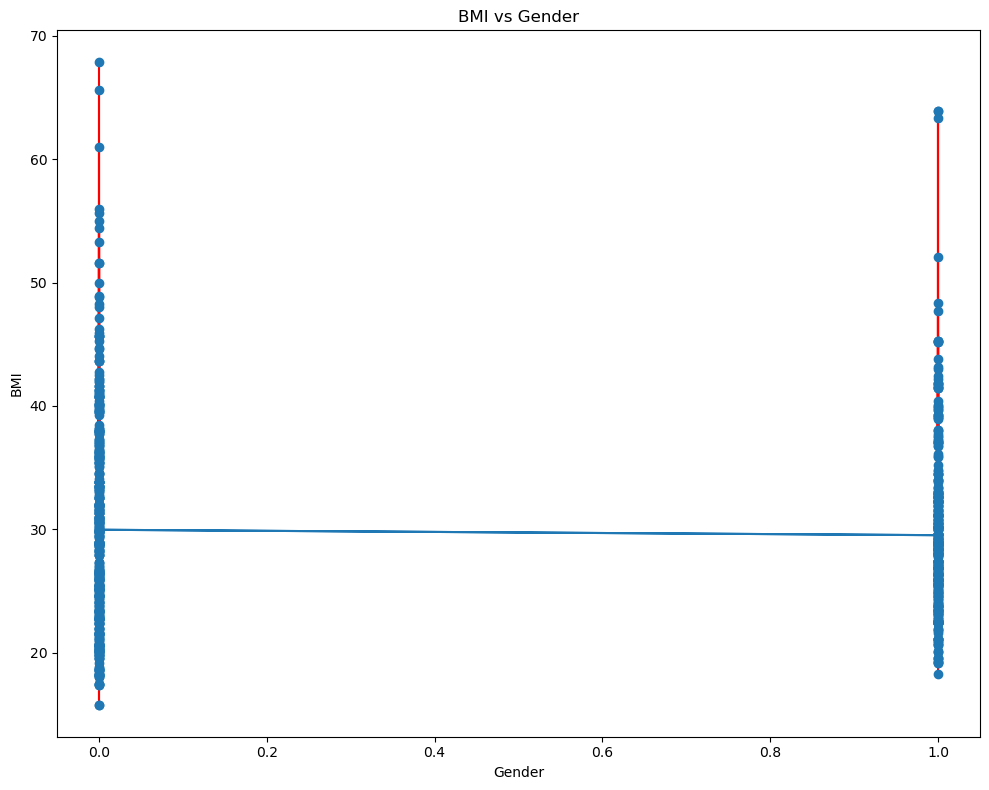

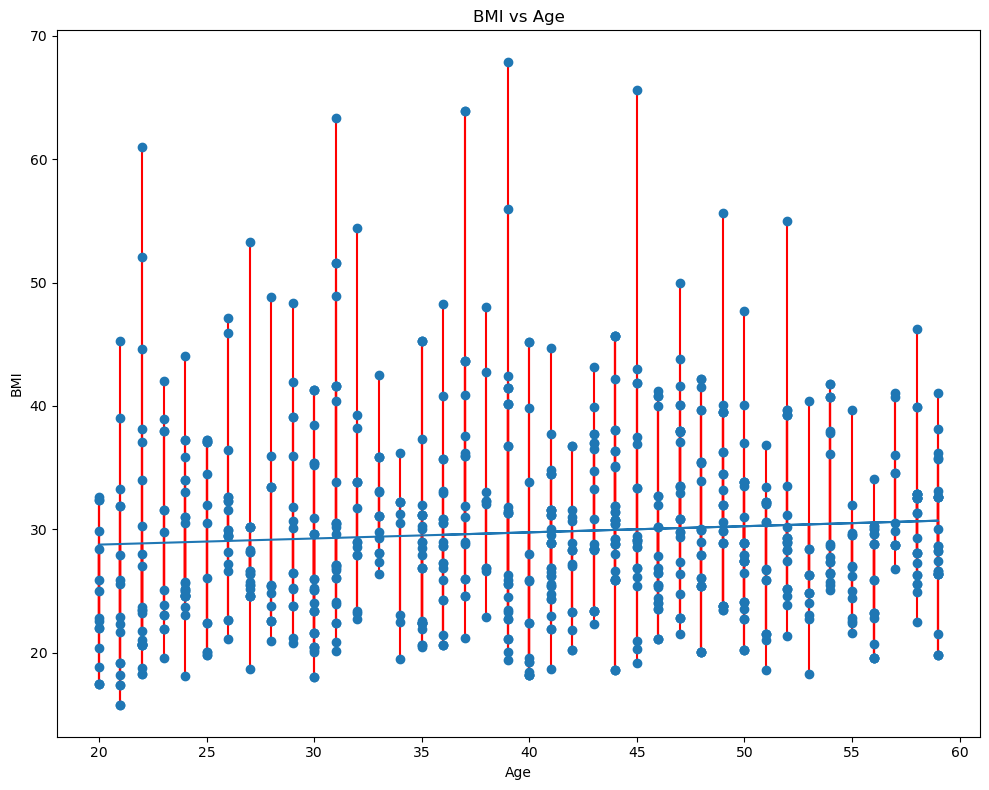

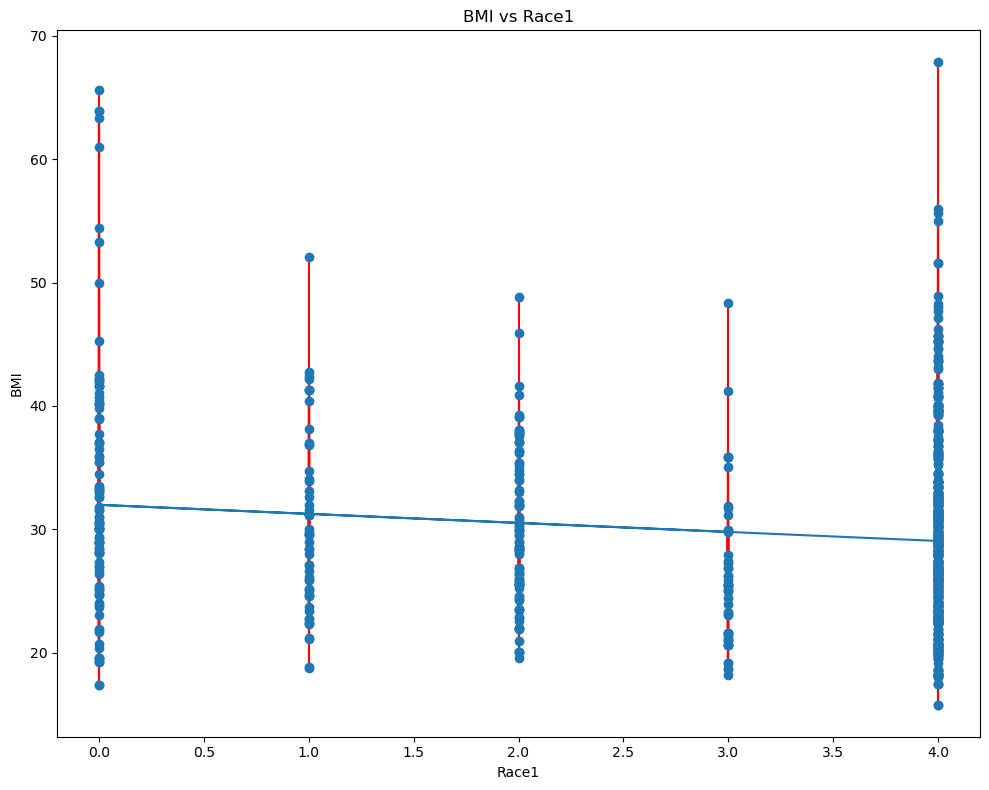

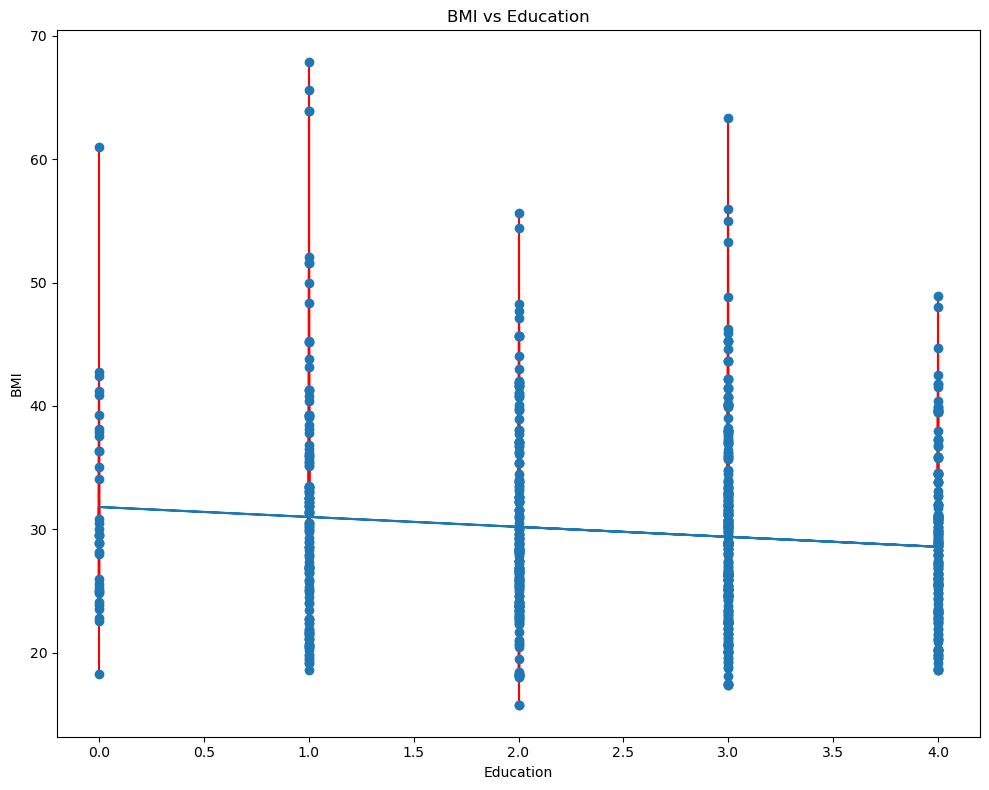

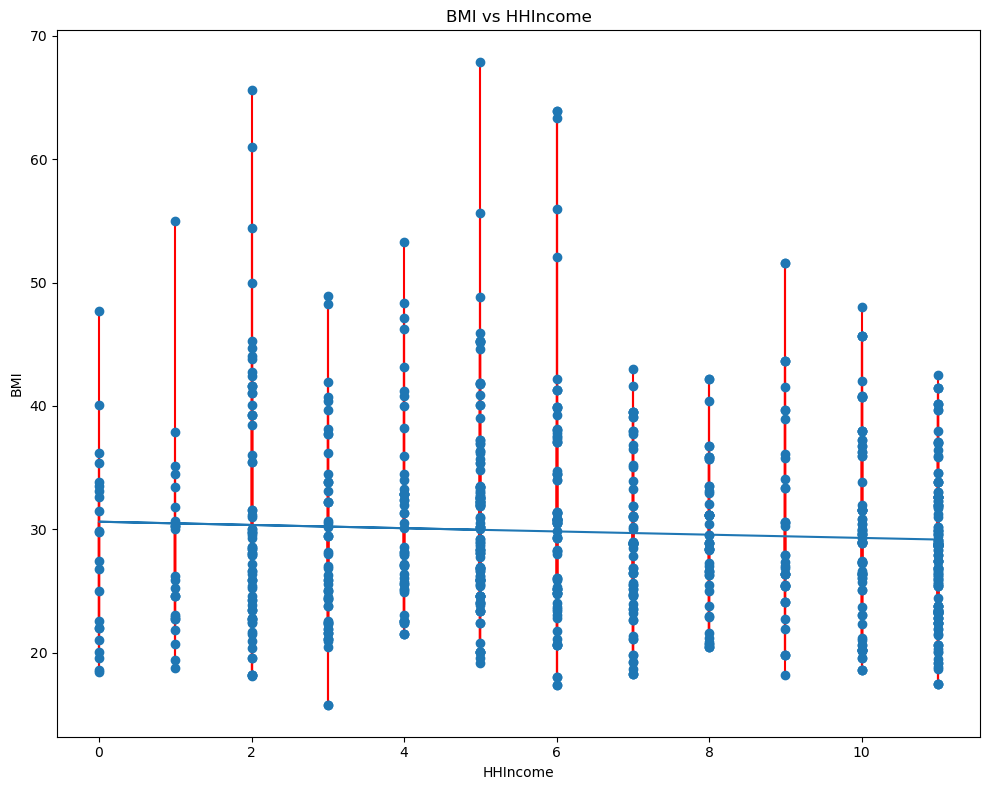

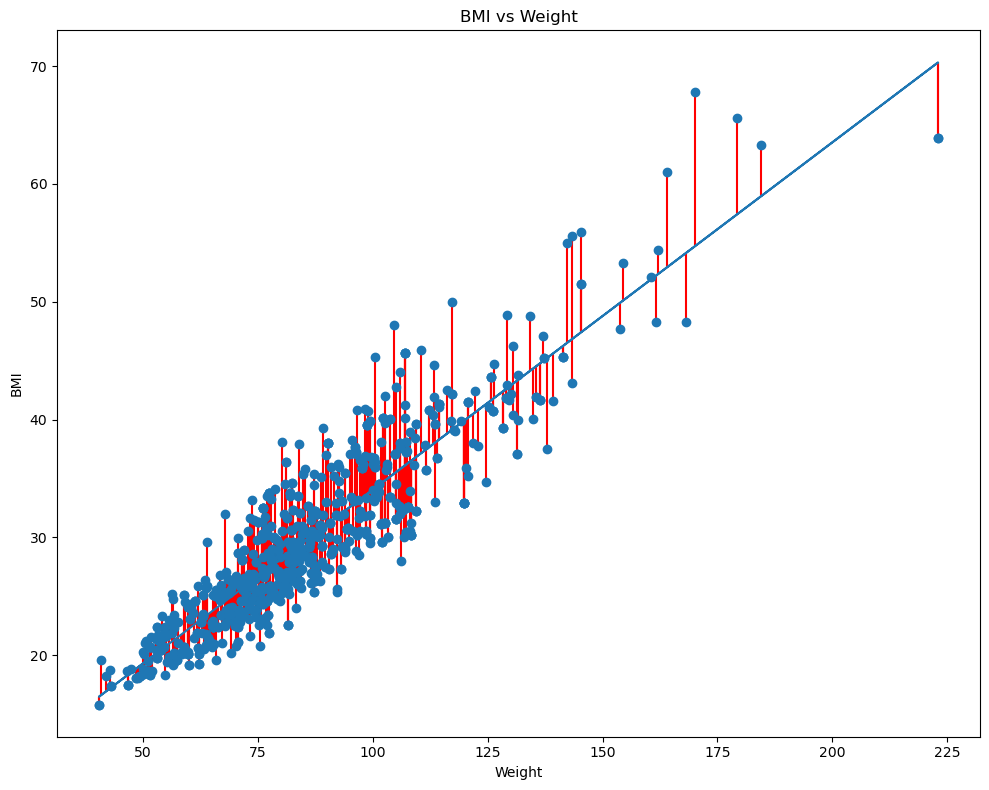

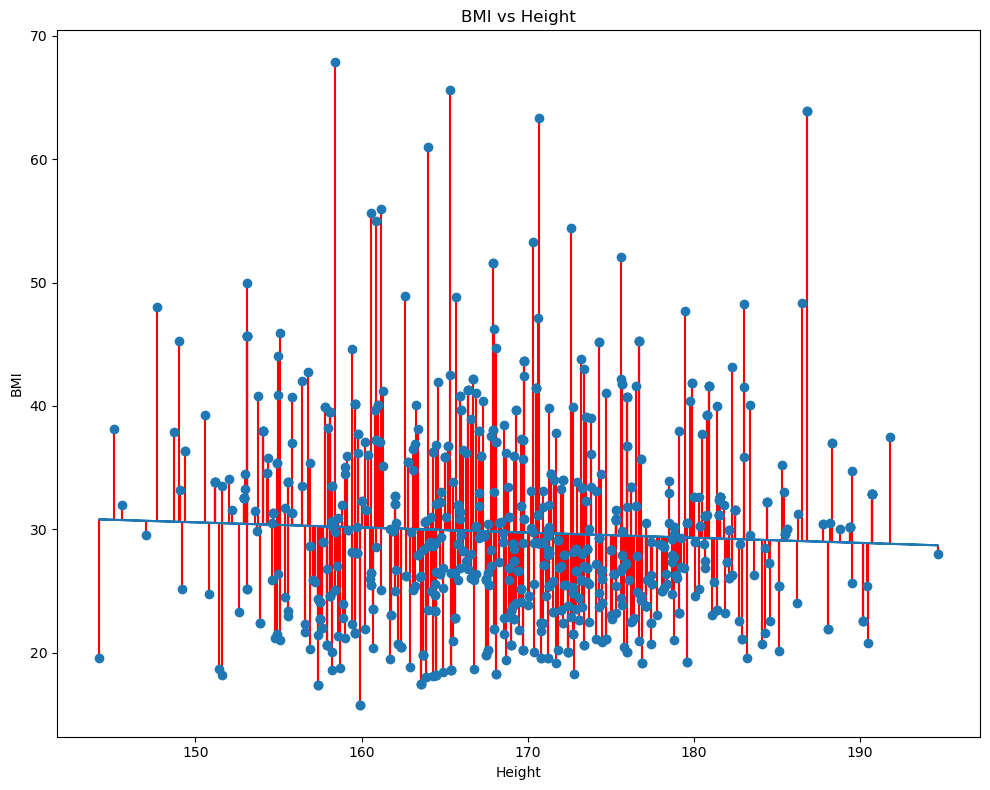

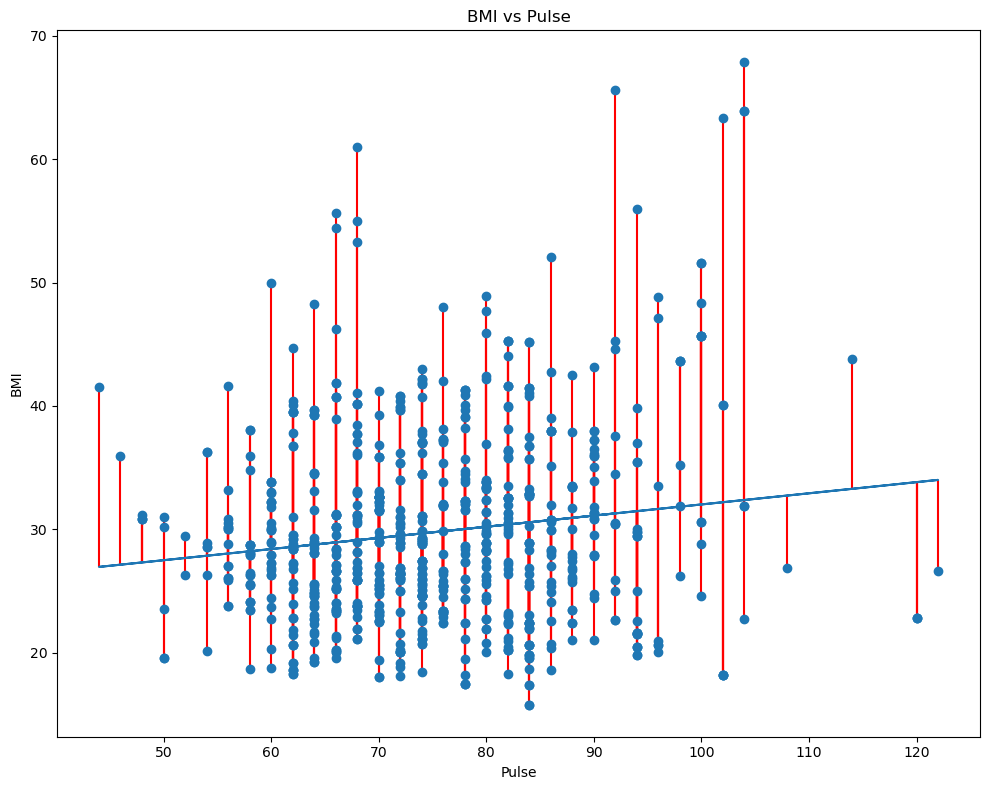

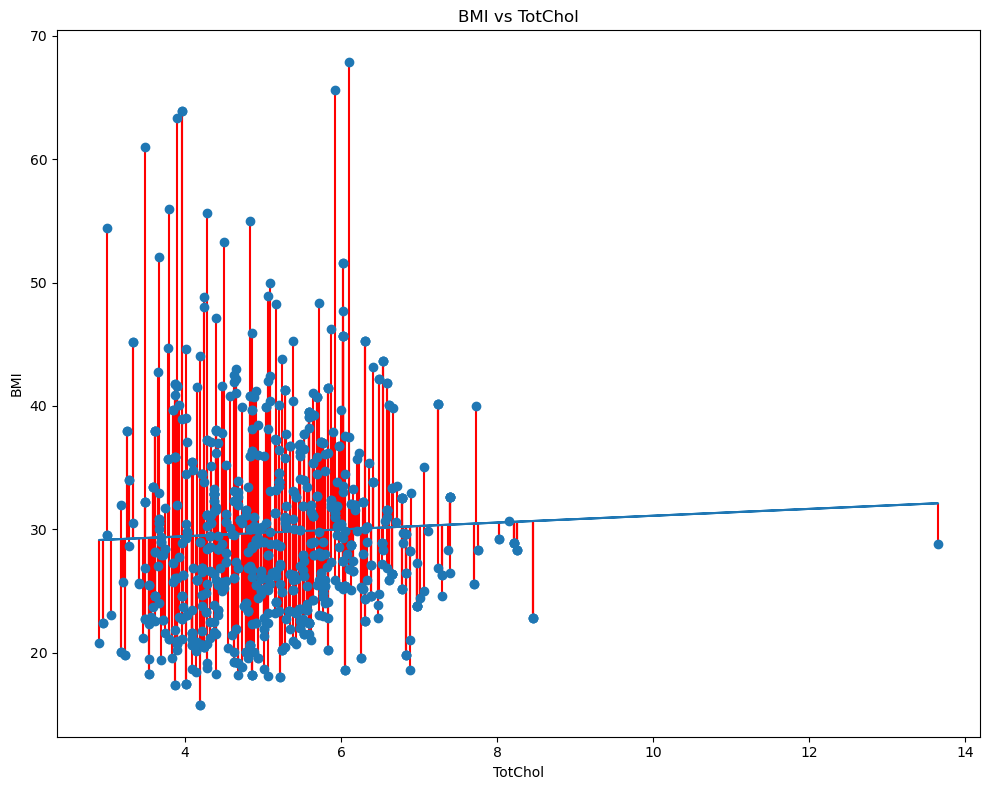

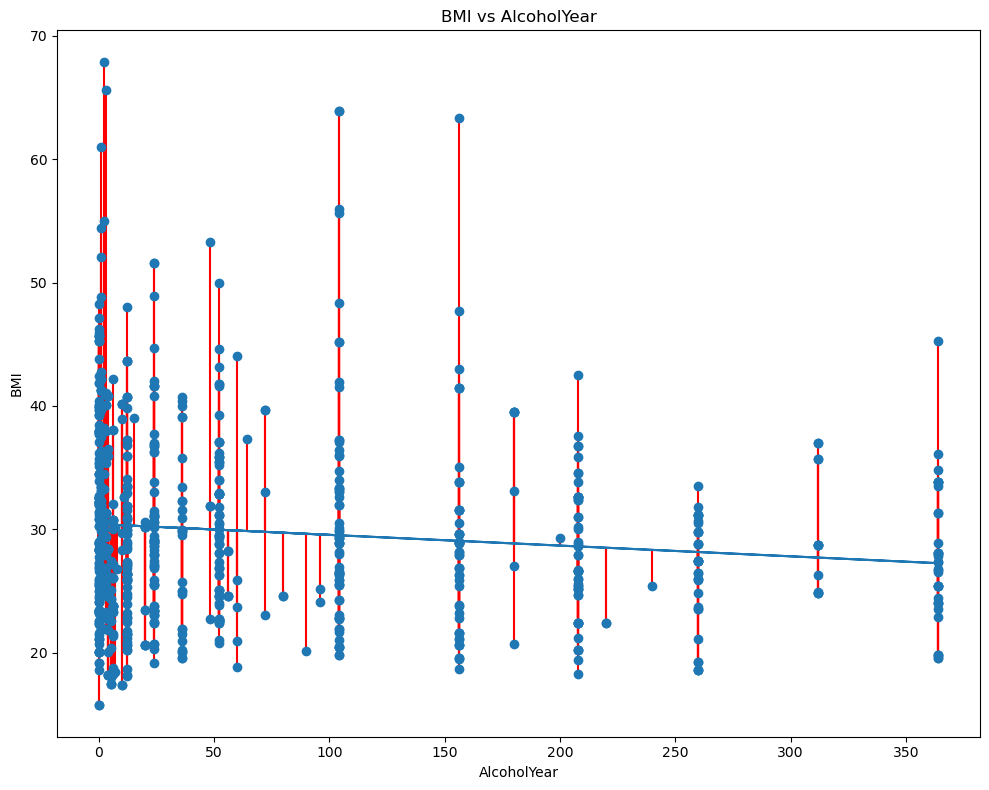

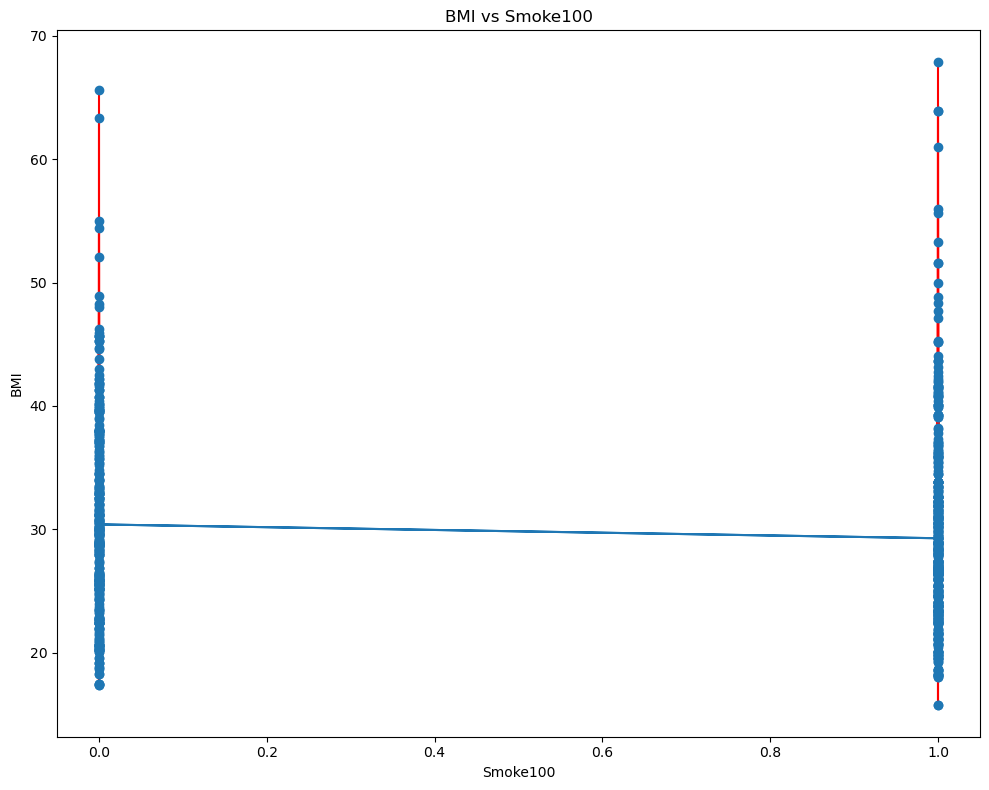

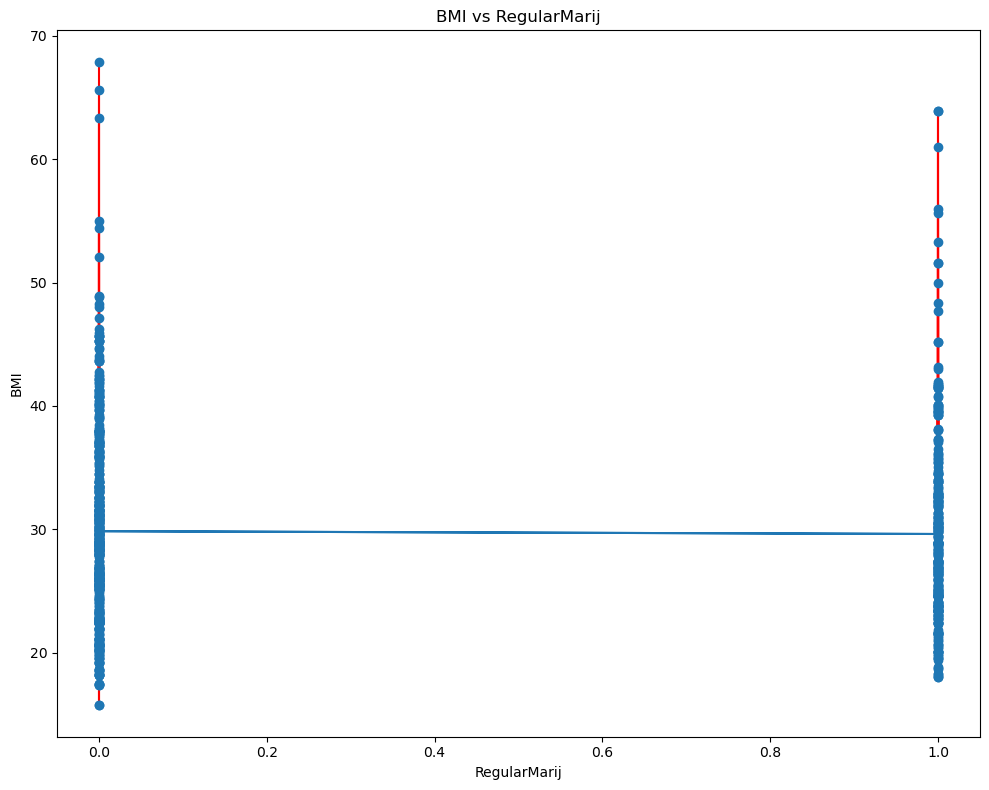

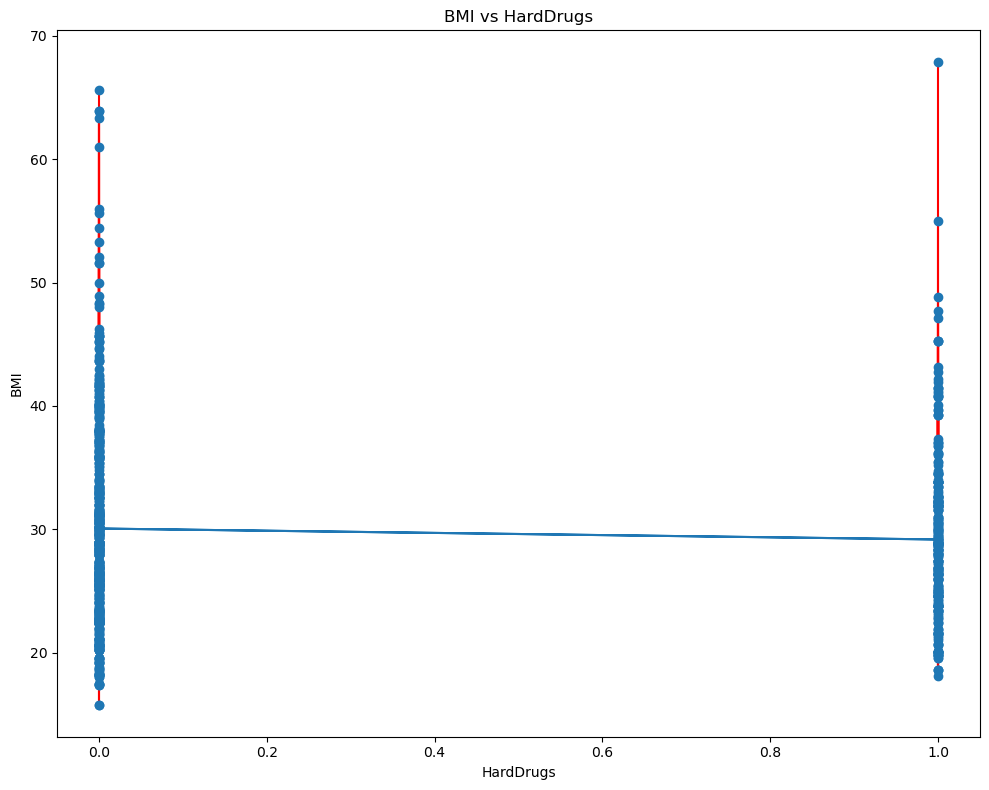

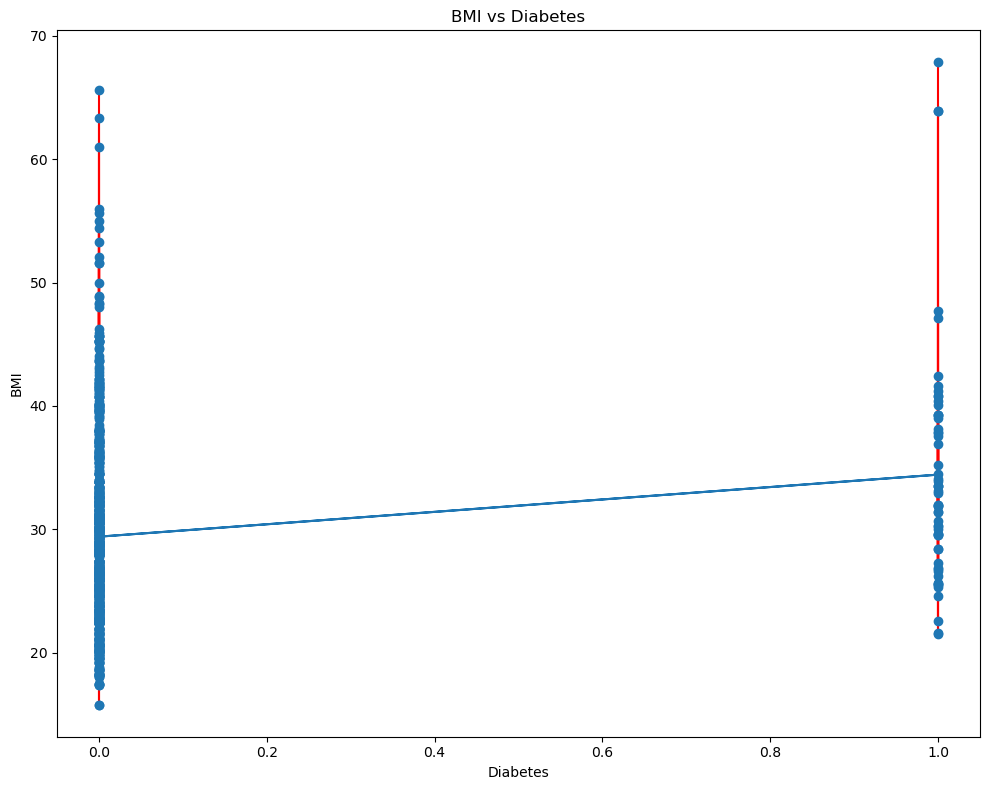

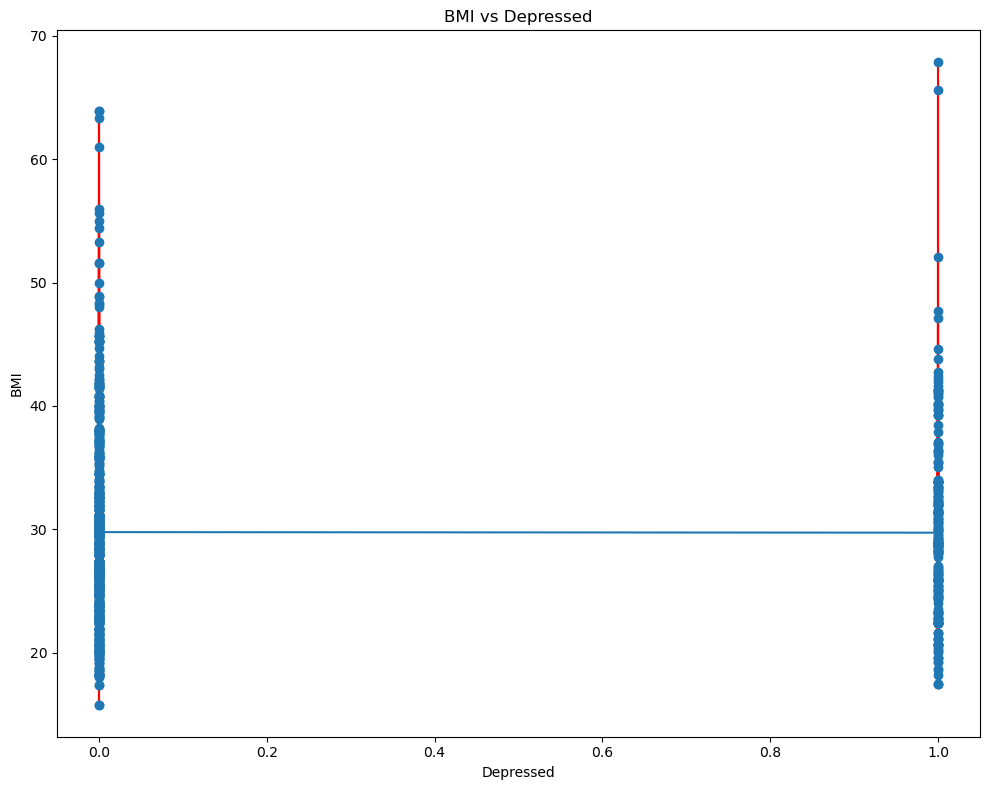

,x,intercept,slope,mse,r2
5,Weight,4.559333,0.294836,10.583917,0.819248
13,Diabetes,29.406531,5.026136,56.886635,0.028490
7,Pulse,22.981365,0.090362,57.396536,0.019782
2,Race1,31.987135,-0.732135,57.424462,0.019305
3,Education,31.812656,-0.805779,57.725965,0.014156
9,AlcoholYear,30.422375,-0.008689,57.786425,0.013123
1,Age,27.769724,0.049698,58.240962,0.005361
10,Smoke100,30.399808,-1.120581,58.246648,0.005263
4,HHIncome,30.618241,-0.131160,58.371550,0.003130
12,HardDrugs,30.066349,-0.886523,58.378177,0.003017


In [75]:
# Response.
y_col = 'BMI'

# Predictors (everything except BMI).
x_cols = [c for c in NHANES_trim.columns if c != y_col]

rows = []
for x_col in x_cols:
    # Fit linear regression.
    X = NHANES_trim[[x_col]]
    y = NHANES_trim[[y_col]]
    lin = LinearRegression().fit(X, y)
    y_hat = lin.predict(X)

    # Metrics.
    mse = np.mean((y.values - y_hat) ** 2)
    r2 = lin.score(X, y)
    rows.append({
        'x': x_col,
        'intercept': float(lin.intercept_.ravel()[0]),
        'slope': float(lin.coef_.ravel()[0]),
        'mse': float(mse),
        'r2': float(r2)
    })

    # Plot.
    plt.figure(figsize = (10, 8))
    plt.scatter(X[x_col], y[y_col], zorder = 5)
    plt.plot(X[x_col], y_hat, zorder = 3)
    plt.vlines(
        X[x_col],
        ymin = np.minimum(y[y_col].values, y_hat.ravel()),
        ymax = np.maximum(y[y_col].values, y_hat.ravel()),
        color = 'red'
    )
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{y_col} vs {x_col}')
    plt.tight_layout()
    plt.show()

results = pd.DataFrame(rows).sort_values(by = 'mse', ascending = True)
results

5. A: Among the single-predictor linear regressions with $\mathrm{BMI}$ as the response, `Weight` has the best fit by a wide margin (highest $R^2 \approx 0.819$ and lowest MSE $\approx 10.584$). This strong performance makes sense because BMI is defined from body mass and height:

$$
\mathrm{BMI} = \frac{\mathrm{Weight}}{\mathrm{Height}^2},
$$

so weight is mechanically and directly related to BMI (and height would matter too, but the relationship is non-linear in height because of the square). Most of the other predictors (e.g., `Education`, `Race1`, `Smoke100`, `Depressed`, etc.) have very small $R^2$ values near $0$, meaning they explain little of the variation in BMI with a linear one-variable model. When the method “fails” (i.e., produces an almost flat fitted line and near-zero $R^2$), it is typically because the predictor is categorical/ordinal codes or has only a few discrete levels, so the numeric encoding does not represent a meaningful continuous scale. In those cases, a simple straight-line relationship is not appropriate; you would instead treat those variables as categorical (one-hot/dummies) or use a model that can capture non-linear effects and interactions. Height is another example where a linear fit can look weak because BMI depends on $1/\mathrm{Height}^2$, not height itself, so a straight line in height is misspecified even though height is part of the BMI formula.